In [187]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt 

In [188]:
# load the dataset 
df = pd.read_csv("prepared_data.csv")
df.head()

,Unnamed: 0,Target,fblk,nblk,anchor_exact_keyword,anchor_keyword,pa_score,ref_dom,outb_dom,mon_visits,...,h3kw,alt,altkw,linkin,linkout,urllen,urlkw,txtlen,txtkw,domain_age
0,0,0,466,957,451,948,79,403,10,1.600000e+07,...,0,5,1,136,14,90,1,2175,55,23
1,1,0,60000,10500,40702,44594,98,5300,123,6.700000e+09,...,1,8,1,1723,642,43,1,7626,137,0
2,2,0,1800,2400,634,1493,62,805,35,3.900000e+06,...,1,23,9,828,74,57,1,2591,217,8
3,3,0,968,1300,589,1300,85,466,1,3.310000e+07,...,0,3,0,62,5,45,1,1318,41,36
4,4,0,3700,1000,254,761,70,492,6,2.470000e+07,...,7,48,4,139,49,54,1,2045,103,33


In [189]:
df.drop('Unnamed: 0',axis=1,inplace=True) # drop the unnamed column

In [190]:
target = df['Target']
cols = df.columns.drop('Target')
features = df[cols] 

In [191]:
X_train,X_test,y_train,y_test = train_test_split(features,target,train_size=0.8,random_state=42)

In [192]:
#initalize the model 
model = RandomForestClassifier(random_state=3,n_estimators=100,criterion='gini')

In [193]:
#train the model 
model.fit(X_train,y_train)

RandomForestClassifier(random_state=3)

In [194]:
def model_metrices(model,X_test,y_test):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test,y_pred)
    c_report = classification_report(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    print(accuracy)
    print(c_report)
    sns.heatmap(conf_matrix,annot=True)
    plt.title("Confusion matrix")
    plt.show()


0.6153846153846154
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        53
           1       0.55      0.63      0.59        52
           2       0.45      0.33      0.38        51

    accuracy                           0.62       156
   macro avg       0.60      0.61      0.60       156
weighted avg       0.60      0.62      0.60       156



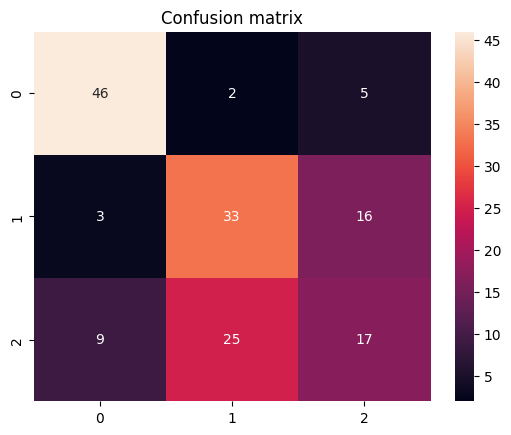

In [195]:
model_metrices(model,X_test,y_test)

In [196]:
features_importance = model.feature_importances_

In [197]:

importance_df = pd.DataFrame({'Feature':cols,'Importance':features_importance})

In [198]:
importance_df.sort_values(by='Importance',ascending=False,inplace=True,ignore_index=True)

In [199]:
importance_df

,Feature,Importance
0,anchor_exact_keyword,0.114521
1,mon_visits,0.066521
2,ref_dom,0.049131
3,txtkw,0.047751
4,keywords_ranked_on,0.047392
5,anchor_keyword,0.046199
6,nblk,0.043691
7,fblk,0.042129
8,txtlen,0.035168
9,pa_score,0.032842


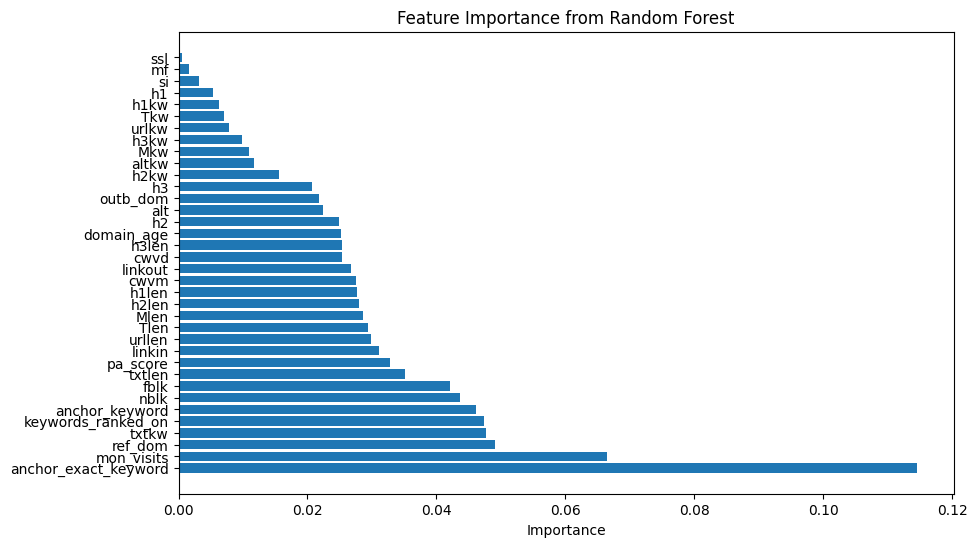

In [200]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


In [201]:
threshold = 0.000447
selected_features = importance_df[importance_df['Importance']>=threshold]['Feature'].to_list()

In [202]:
target,features = df['Target'],df[selected_features]

In [203]:
features.shape

(777, 36)

In [204]:
X_train,X_test,y_train,y_test = train_test_split(features,target,train_size=0.8,random_state=44)

In [205]:
model = RandomForestClassifier(random_state=34,n_estimators=100)

In [206]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=34)

0.6538461538461539
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        51
           1       0.65      0.63      0.64        57
           2       0.51      0.48      0.49        48

    accuracy                           0.65       156
   macro avg       0.64      0.65      0.65       156
weighted avg       0.65      0.65      0.65       156



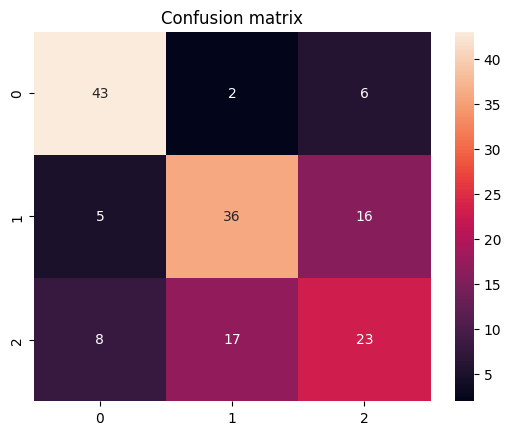

In [207]:
model_metrices(model,X_test,y_test)

In [208]:
from sklearn.naive_bayes import GaussianNB

In [209]:
model = GaussianNB(var_smoothing=1)

In [210]:
model.fit(X_train,y_train)

GaussianNB(var_smoothing=1)

In [211]:
X_test.shape

(156, 36)

0.33974358974358976
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        51
           1       0.00      0.00      0.00        57
           2       1.00      0.04      0.08        48

    accuracy                           0.34       156
   macro avg       0.44      0.35      0.19       156
weighted avg       0.42      0.34      0.19       156



e:\ml assignment\assignment\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\ml assignment\assignment\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\ml assignment\assignment\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


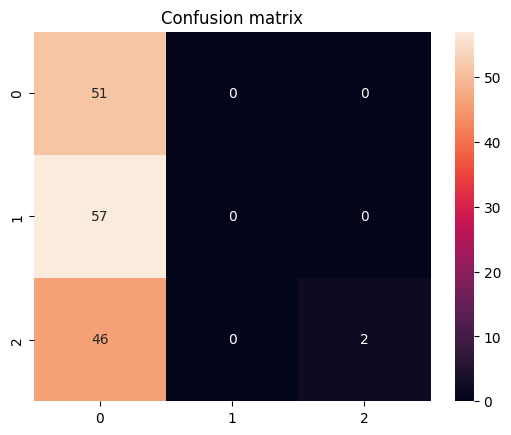

In [212]:
model_metrices(model,X_test,y_test)

In [213]:
from sklearn.svm  import SVC

In [214]:
model = SVC(kernel='poly', degree=3)

In [215]:
model.fit(X_train,y_train)

SVC(kernel='poly')

0.33974358974358976
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        51
           1       0.00      0.00      0.00        57
           2       1.00      0.04      0.08        48

    accuracy                           0.34       156
   macro avg       0.44      0.35      0.19       156
weighted avg       0.42      0.34      0.19       156



e:\ml assignment\assignment\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\ml assignment\assignment\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\ml assignment\assignment\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


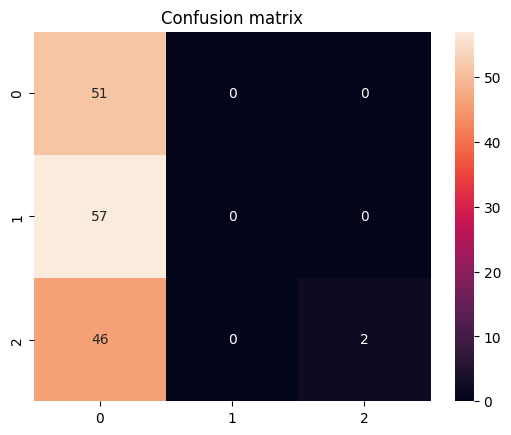

In [216]:
model_metrices(model,X_test,y_test)

In [217]:
from sklearn import tree

In [218]:
decision_tree = tree.DecisionTreeClassifier(random_state=42)

In [219]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

0.5064102564102564
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        51
           1       0.48      0.46      0.47        57
           2       0.33      0.35      0.34        48

    accuracy                           0.51       156
   macro avg       0.51      0.51      0.51       156
weighted avg       0.51      0.51      0.51       156



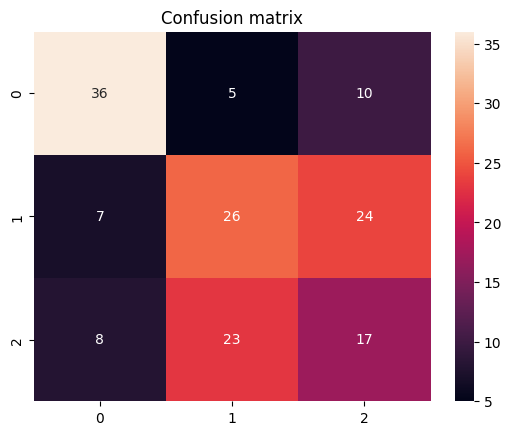

In [220]:
model_metrices(decision_tree,X_test,y_test)